In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Read the csv data into pandas
data_frame=pd.read_csv("311_cases.csv", usecols=["CaseID","Opened","Closed","Responsible Agency",
                                "Category","Request Type","Request Details","Latitude","Source","Longitude"])

In [3]:
##Checkout the first few rows of the data frame
data_frame.head(5)

,CaseID,Opened,Closed,Responsible Agency,Category,Request Type,Request Details,Latitude,Longitude,Source
0,241459,07/02/2008 03:16:55 PM,07/12/2010 10:16:59 AM,DPW Ops Queue,Tree Maintenance,Trees - Damaging_Property,Lifted_sidewalk_tree_roots,37.80493,-122.4381,Phone
1,241538,07/02/2008 04:47:08 PM,06/25/2010 11:16:56 AM,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Hanging_limb,37.78257,-122.4308,Phone
2,241571,07/02/2008 05:54:07 PM,10/21/2010 12:09:32 PM,DPW Ops Queue,Tree Maintenance,Trees - Overgrown_Tree,Blocking_street_lights,37.78120,-122.4650,Phone
3,241909,07/03/2008 12:38:04 PM,06/25/2010 11:16:56 AM,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Sprinkler_system_issues,37.74384,-122.4244,Phone
4,241917,07/03/2008 12:44:26 PM,07/06/2010 06:16:58 PM,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,37.78361,-122.3898,Phone


In [4]:
## Number of rows in the dataframe
print(data_frame["CaseID"].count()+1)

2837820


In [5]:
## Delete the cases that are not closed
data_frame.dropna(axis=0,inplace=True)

In [6]:
print(data_frame["CaseID"].count()+1)

2690358


In [7]:
### Convert str to datetime for column "Opened"
data_frame["Opened"]=pd.to_datetime(data_frame["Opened"],format="%m/%d/%Y %I:%M:%S %p")

In [8]:
### Convert str to datetime for column "Closed"
data_frame["Closed"]=pd.to_datetime(data_frame["Closed"],format="%m/%d/%Y %I:%M:%S %p")

In [9]:
##Calculate process time in seconds

data_frame["ProcessTime"]=data_frame["Closed"].subtract(data_frame["Opened"]).astype('timedelta64[h]')
print(type(data_frame["ProcessTime"].iloc[0]))
data_frame.head(2)


<class 'numpy.float64'>


,CaseID,Opened,Closed,Responsible Agency,Category,Request Type,Request Details,Latitude,Longitude,Source,ProcessTime
0,241459,2008-07-02 15:16:55,2010-07-12 10:16:59,DPW Ops Queue,Tree Maintenance,Trees - Damaging_Property,Lifted_sidewalk_tree_roots,37.80493,-122.4381,Phone,17755.0
1,241538,2008-07-02 16:47:08,2010-06-25 11:16:56,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Hanging_limb,37.78257,-122.4308,Phone,17346.0


In [15]:
data_frame["OpenHour"]=data_frame["Opened"].apply(lambda x: x.hour)

In [16]:
data_frame["OpenDay"]=data_frame["Opened"].apply(lambda x: x.dayofweek)

In [17]:
data_frame["OpenMonth"]=data_frame["Opened"].apply(lambda x: x.month)

In [18]:
data_frame.head(3)

,CaseID,Opened,Closed,Responsible Agency,Category,Request Type,Request Details,Latitude,Longitude,Source,ProcessTime,OpenHour,OpenDay,OpenMonth
0,241459,2008-07-02 15:16:55,2010-07-12 10:16:59,DPW Ops Queue,Tree Maintenance,Trees - Damaging_Property,Lifted_sidewalk_tree_roots,37.80493,-122.4381,Phone,17755.0,15,2,7
1,241538,2008-07-02 16:47:08,2010-06-25 11:16:56,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Hanging_limb,37.78257,-122.4308,Phone,17346.0,16,2,7
2,241571,2008-07-02 17:54:07,2010-10-21 12:09:32,DPW Ops Queue,Tree Maintenance,Trees - Overgrown_Tree,Blocking_street_lights,37.78120,-122.4650,Phone,20178.0,17,2,7


In [25]:
print("Number of levels under Responsible Agency is {}".format(len(data_frame.groupby(["Responsible Agency"],axis=0))))
print("Number of levels under Category is {}".format(len(data_frame.groupby(["Category"],axis=0))))
print("Number of levels under Request Type is {}".format(len(data_frame.groupby(["Request Type"],axis=0))))
print("Number of levels under Request Details is {}".format(len(data_frame.groupby(["Request Details"],axis=0))))
print("Number of levels under Source is {}".format(len(data_frame.groupby(["Source"],axis=0))))

Number of levels under Responsible Agency is 385
Number of levels under Category is 99
Number of levels under Request Type is 1174
Number of levels under Request Details is 148878
Number of levels under Source is 8


In [29]:
data_frame.groupby("Category")["Request Type"].nunique().head(10)
print("Number of levels under Category is {}".format(len(data_frame.groupby(["Category"],axis=0))))

Category
311 External Request           15
Abandoned Vehicle              11
Blocked Street or SideWalk      3
Catch Basin Maintenance         2
Color Curb                     21
Construction Zone Permits     832
DPW Volunteer Programs          5
Damaged Property               12
Encampments                     2
General Request -               6
Name: Request Type, dtype: int64

In [31]:
data_frame["ProcessTime"].describe()

count    2.690357e+06
mean     8.438935e+02
std      3.596942e+03
min     -2.252000e+04
25%      1.100000e+01
50%      5.200000e+01
75%      1.920000e+02
max      8.114000e+04
Name: ProcessTime, dtype: float64

In [35]:
### Filter rows for negative process times
data_frame.mask(data_frame["ProcessTime"]<=0,inplace=True)
data_frame.dropna(axis=0,inplace=True)

In [36]:
### Calculate min and max to eliminate outliers
q25=data_frame["ProcessTime"].quantile(0.25)
q75=data_frame["ProcessTime"].quantile(0.75)
IQR=q75-q25
d_min=q25-1.5*IQR
d_max=q75+1.5*IQR
data_frame.mask(data_frame["ProcessTime"]<d_min,inplace=True)
data_frame.mask(data_frame["ProcessTime"]>d_max,inplace=True)
data_frame.dropna(axis=0,inplace=True)


In [37]:
data_frame.head(2)

,CaseID,Opened,Closed,Responsible Agency,Category,Request Type,Request Details,Latitude,Longitude,Source,ProcessTime,OpenHour,OpenDay,OpenMonth
36,342254.0,2008-12-31 14:25:49,2008-12-31 16:40:16,311 Supervisor Queue,Graffiti,Graffiti on Signal_box,Signal_box - Offensive,37.78684,-122.4501,Web,2.0,14.0,2.0,12.0
37,928326.0,2011-07-27 09:46:02,2011-07-27 13:43:57,SSP - MTA Feedback Queue,MUNI Feedback,MUNI - Services_Service_Planning,701_Insufficient_Frequency,0.00000,0.0000,Web,3.0,9.0,2.0,7.0


In [38]:
print(data_frame["ProcessTime"].count()+1)
data_frame.ProcessTime.describe()


2077687


count    2.077686e+06
mean     8.395507e+01
std      1.047634e+02
min      1.000000e+00
25%      1.300000e+01
50%      4.400000e+01
75%      1.170000e+02
max      5.290000e+02
Name: ProcessTime, dtype: float64

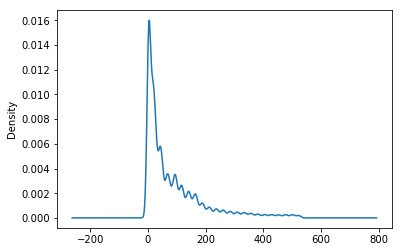

In [56]:
plt.figure()
#data_frame["ProcessTime"].plot.box()
data_frame["ProcessTime"].plot(kind='kde')


In [40]:
data_frame.Latitude.describe()

count    2.077686e+06
mean     3.280351e+01
std      1.275587e+01
min      0.000000e+00
25%      3.773278e+01
50%      3.776328e+01
75%      3.777980e+01
max      3.788160e+01
Name: Latitude, dtype: float64

In [41]:
data_frame.Longitude.describe()

count    2.077686e+06
mean    -1.063490e+02
std      4.135445e+01
min     -1.412191e+02
25%     -1.224385e+02
50%     -1.224187e+02
75%     -1.224049e+02
max      0.000000e+00
Name: Longitude, dtype: float64

In [42]:
data_frame.mask(data_frame["Latitude"]==0.0,inplace=True)
data_frame.mask(data_frame["Longitude"]==0.0,inplace=True)
data_frame.dropna(axis=0,inplace=True)
data_frame.head(2)

,CaseID,Opened,Closed,Responsible Agency,Category,Request Type,Request Details,Latitude,Longitude,Source,ProcessTime,OpenHour,OpenDay,OpenMonth
36,342254.0,2008-12-31 14:25:49,2008-12-31 16:40:16,311 Supervisor Queue,Graffiti,Graffiti on Signal_box,Signal_box - Offensive,37.78684,-122.4501,Web,2.0,14.0,2.0,12.0
47,342168.0,2008-12-31 13:00:46,2008-12-31 14:07:06,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,37.78075,-122.4871,Phone,1.0,13.0,2.0,12.0


In [43]:
from sklearn import base
import numpy as np

In [44]:
### An estimator class to pass Feature Union
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X,y=None):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        return [[row[1][n] for n in self.col_names] for row in X.iterrows()]
    


In [45]:
### Checkout the class
cst = ColumnSelectTransformer(['Latitude', 'Longitude'])
assert (cst.fit_transform(data_frame.iloc[:1]))== [[data_frame.iloc[0]['Latitude'], data_frame.iloc[0]['Longitude']]]

In [46]:
## One-hot encoding of categorical features
class Encoder(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,column,data):
        from sklearn.preprocessing import LabelBinarizer
        self.encoder=LabelBinarizer()
        self.column=column
        self.encoder.fit(data[self.column])
        
    
    def fit(self, X,y=None):
        return self

    def transform(self, X,y=None):
        return self.encoder.transform(X[self.column])
    

    



In [47]:
from sklearn.pipeline import FeatureUnion
###Learn dictonaries for each categorical data
num_of_data=data_frame["Category"].count()
cst = ColumnSelectTransformer(['Latitude', 'Longitude','OpenHour','OpenDay','OpenMonth'])
enc1=Encoder("Responsible Agency",data_frame[:num_of_data])
enc2=Encoder("Category",data_frame[:num_of_data])
enc3=Encoder("Request Type",data_frame[:num_of_data])
enc4=Encoder("Source",data_frame[:num_of_data])
estimators=[("trans",cst),("enc1",enc1),("enc2",enc2),("enc3",enc3),("enc4",enc4)]
union=FeatureUnion(estimators)

In [48]:
## Prepare train and test data
from sklearn.model_selection import train_test_split
data_frame.dropna(axis=0,inplace=True)
target=ColumnSelectTransformer(["ProcessTime"]).fit_transform(data_frame[:num_of_data])
X_train, X_test, y_train, y_test = train_test_split(data_frame[:num_of_data], target[:num_of_data], 
                                                    test_size=0.1, random_state=42)

In [49]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
reg=SGDRegressor(alpha=0.00003,loss="huber",penalty="l2",learning_rate="optimal",shuffle=False)
pipe=Pipeline([("feature",union),("reg",reg)])
pipe.fit(X_train,y_train)



/Users/ozlemsenlik/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('feature', FeatureUnion(n_jobs=1,
       transformer_list=[('trans', ColumnSelectTransformer(col_names=['Latitude', 'Longitude', 'OpenHour', 'OpenDay', 'OpenMonth'])), ('enc1', Encoder(column='Responsible Agency', data=None)), ('enc2', Encoder(column='Category', data=None)), ('enc3', Encoder... penalty='l2', power_t=0.25,
       random_state=None, shuffle=False, verbose=0, warm_start=False))])

In [50]:
from sklearn.metrics import mean_absolute_error
y_predict=pipe.predict(X_test)
mean_absolute_error(y_test,y_predict)

59.970428672131945

In [51]:
y_predict[:10]

array([ 57.94251873,  56.82411279,  29.60694964,  54.09997398,
       103.56281911,  69.34229255,   7.1215897 ,  68.61974598,
        10.43402891,  23.81016697])

In [52]:
y_test[:10]

[[53.0], [124.0], [79.0], [17.0], [212.0], [13.0], [5.0], [6.0], [1.0], [45.0]]

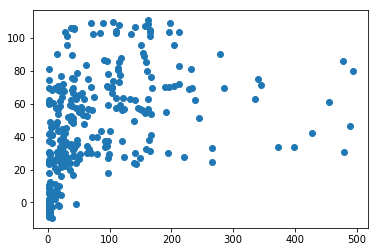

In [53]:
plt.figure()
plt.scatter(y_test[:300],y_predict[:300])